# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [165]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
from urllib.request import urlopen

# Import API key
from api_keys import key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
out_file = "city_data.csv"


# Range of latitudes and longitu|des
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [18]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

In [19]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))

613


In [20]:
def city_data(city, key):

    payload = {'q' : city,
               'APPID' : key
              }
    resp = requests.get("https://api.openweathermap.org/data/2.5/weather", params=payload)
    
    city_data = {'name' : resp.json()['name'],
                 'lat' : resp.json()['coord']['lat'],
                 'temp' : resp.json()['main']['temp_max'],
                 'humidity' : resp.json()['main']['humidity'],
                 'cloudiness' : resp.json()['clouds']['all'],
                 'wind_speed' : resp.json()['wind']['speed']
                }

    return city_data

In [167]:
resp2 = requests.get('https://api.openweathermap.org/data/2.5/weather?q=London&appid=' + str(key))
resp2.status_code

200

In [21]:

c_data = []

for city in cities:
    try: 
        x = city_data(city, key)
        c_data.append(x)
        
        print(x)
        
        time.sleep(1.01)
        
    except:
        print('City not Found')

{'name': 'Bandarbeyla', 'lat': 9.49, 'temp': 298.79, 'humidity': 77, 'cloudiness': 8, 'wind_speed': 8.07}
{'name': 'Zhigansk', 'lat': 66.77, 'temp': 238.06, 'humidity': 93, 'cloudiness': 39, 'wind_speed': 4.5}
{'name': 'Punta Arenas', 'lat': -53.16, 'temp': 285.15, 'humidity': 49, 'cloudiness': 57, 'wind_speed': 3.6}
{'name': 'Alamosa', 'lat': 37.47, 'temp': 259.26, 'humidity': 60, 'cloudiness': 1, 'wind_speed': 3.6}
{'name': 'Castro', 'lat': -42.48, 'temp': 294.15, 'humidity': 73, 'cloudiness': 75, 'wind_speed': 5.1}
{'name': 'Cape Town', 'lat': -33.93, 'temp': 296.48, 'humidity': 64, 'cloudiness': 20, 'wind_speed': 9.3}
{'name': 'Busselton', 'lat': -33.64, 'temp': 283.71, 'humidity': 37, 'cloudiness': 0, 'wind_speed': 6.93}
{'name': 'Lebu', 'lat': 8.96, 'temp': 292.15, 'humidity': 52, 'cloudiness': 40, 'wind_speed': 7.2}
{'name': 'Vaini', 'lat': 15.34, 'temp': 291.32, 'humidity': 84, 'cloudiness': 12, 'wind_speed': 1.75}
{'name': 'Hermanus', 'lat': -34.42, 'temp': 296.48, 'humidity':

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
with open(out_file, 'w', newline='') as csvfile:
    fieldnames = list(c_data[0].keys())
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for i in c_data:
    
        writer.writerow(i)

In [145]:
df = pd.read_csv(out_file)

#convert temp from kelvin to celsius
df['temp'] = df['temp'] - 273

#the equal interval from (-90 - 90) is 36 degrees so i grouped 
## the cities by latitude to give a visual idea of regions that are 
###the same distance away from the equator. 
lowr_bin = df.query('lat > -90 and lat <= -54')
low_bin = df.query('lat > -54 and lat <= -18')
mid_bin = df.query('lat > -18 and lat <= 18')
hi_bin = df.query('lat > 18 and lat <= 54')
hirr_bin = df.query('lat > 54 and lat <= 90')

## this group the cities by equal size 'bins' with range max lat and min lat
#lowr_bin = df.query('lat > -54.943 and lat <= -28.204')
#low_bin = df.query('lat > -28.204 and lat <= -1.598')
#mid_bin = df.query('lat > -1.598 and lat <= 25.008')
#hi_bin = df.query('lat > 25.008 and lat <= 51.614')
#hirr_bin = df.query('lat > 51.614 and lat <= 78.22')


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

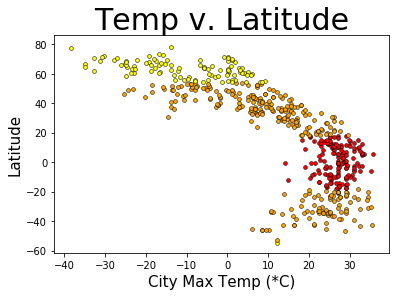

In [152]:
plt.title('Temp v. Latitude', fontsize=30)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('City Max Temp (*C)', fontsize=15)

plt.scatter(lowr_bin.temp, lowr_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='yellow')
plt.scatter(low_bin.temp, low_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='orange')
plt.scatter(mid_bin.temp, mid_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='red')
plt.scatter(hi_bin.temp, hi_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='orange')
plt.scatter(hirr_bin.temp, hirr_bin.lat, s=15, linewidths=.5,edgecolors='black', color='yellow')



plt.show()

#### Latitude vs. Humidity Plot

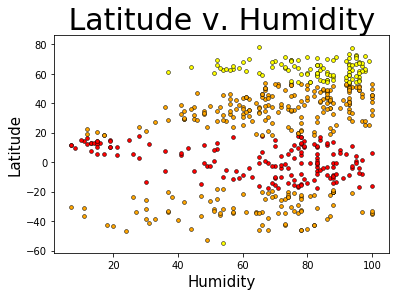

In [154]:
plt.title(' Latitude v. Humidity ', fontsize=30)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Humidity', fontsize=15)
plt.scatter(lowr_bin.humidity, lowr_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='yellow')
plt.scatter(low_bin.humidity, low_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='orange')
plt.scatter(mid_bin.humidity, mid_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='red')
plt.scatter(hi_bin.humidity, hi_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='orange')
plt.scatter(hirr_bin.humidity, hirr_bin.lat, s=15, linewidths=.5,edgecolors='black', color='yellow')

plt.show()



#### Latitude vs. Cloudiness Plot

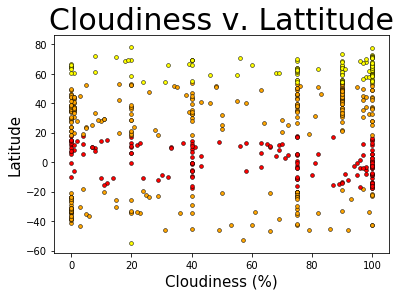

In [151]:
plt.title('Cloudiness v. Lattitude', fontsize=30)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Cloudiness (%)', fontsize=15)
plt.scatter(lowr_bin.cloudiness, lowr_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='yellow')
plt.scatter(low_bin.cloudiness, low_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='orange')
plt.scatter(mid_bin.cloudiness, mid_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='red')
plt.scatter(hi_bin.cloudiness, hi_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='orange')
plt.scatter(hirr_bin.cloudiness, hirr_bin.lat, s=15, linewidths=.5,edgecolors='black', color='yellow')
plt.show()

#### Latitude vs. Wind Speed Plot

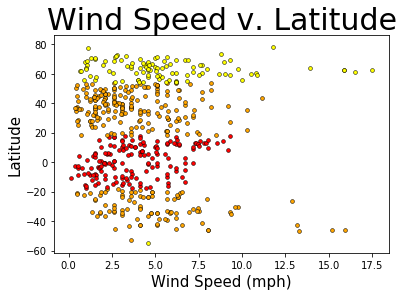

In [150]:
plt.title('Wind Speed v. Latitude', fontsize=30)
plt.ylabel('Latitude', fontsize=15)
plt.xlabel('Wind Speed (mph)', fontsize=15)
plt.scatter(lowr_bin.wind_speed, lowr_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='yellow')
plt.scatter(low_bin.wind_speed, low_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='orange')
plt.scatter(mid_bin.wind_speed, mid_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='red')
plt.scatter(hi_bin.wind_speed, hi_bin.lat, s=15,  linewidths=.5,edgecolors='black', color='orange')
plt.scatter(hirr_bin.wind_speed, hirr_bin.lat, s=15, linewidths=.5,edgecolors='black', color='yellow')
plt.show()